## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [13]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
def build_mlp(input_shape, num_class=10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=num_class, activation='softmax')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    model = build_mlp(x_train.shape[1:])
    optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=MOMENTUM, nesterov=False)    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    val_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train_loss': train_loss,
                             'val_loss': val_loss,
                             'train_acc': train_acc,
                             'val_acc': val_acc}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0703 - accuracy: 0.2265 - val_loss: 1.9126 - val_accuracy: 0.2855
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9495 - accuracy: 0.2763 - val_loss: 2.0453 - val_accuracy: 0.2600
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9096 - accuracy: 0.2957 - val_loss: 1.8508 - val_accuracy: 0.3024
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9008 - accuracy: 0.2925 - val_loss: 1.9842 - val_accuracy: 0.2751
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9225 - accuracy: 0.2806 - val_loss: 1.8880 - val_accuracy: 0.2835
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9331 - accuracy: 0.2763 - val_loss: 1.9463 - val_accuracy: 0.2885
Epoch 7/50
50000/50000 [==============================] - 3s 54us/st

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8802 - accuracy: 0.3178 - val_loss: 1.7213 - val_accuracy: 0.3771
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6771 - accuracy: 0.3989 - val_loss: 1.6298 - val_accuracy: 0.4182
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5905 - accuracy: 0.4306 - val_loss: 1.5327 - val_accuracy: 0.4596
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5329 - accuracy: 0.4512 - val_loss: 1.4987 - val_accuracy: 0.4714
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5012 - accuracy: 0.4623 - val_loss: 1.4883 - val_accuracy: 0.4719
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4537 - accuracy: 0.4816 - val_loss: 1.4330 - val_accuracy: 0.4926
Epoch 7/50
50000/50000 [==============================] - 3s 54us/st

momentum: 0.9, nesterov=False


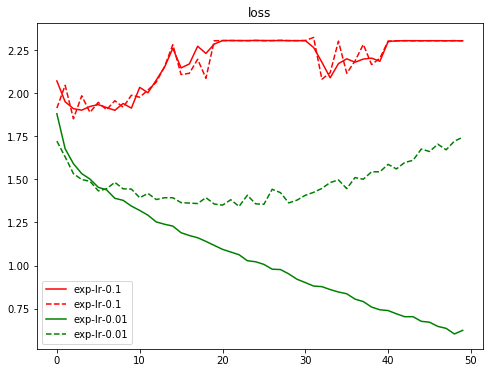

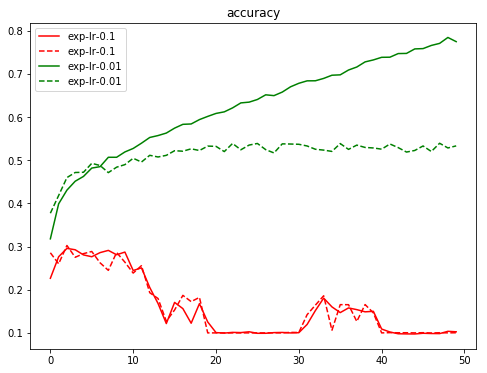

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

print('momentum: 0.9, nesterov=False')
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()
    
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()

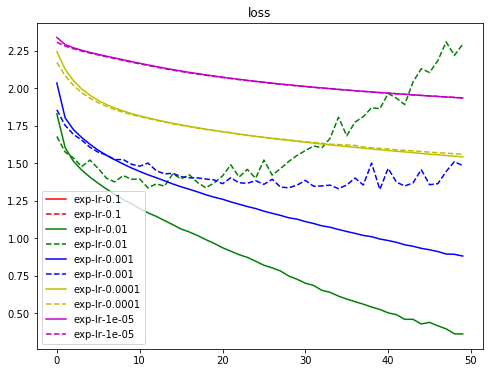

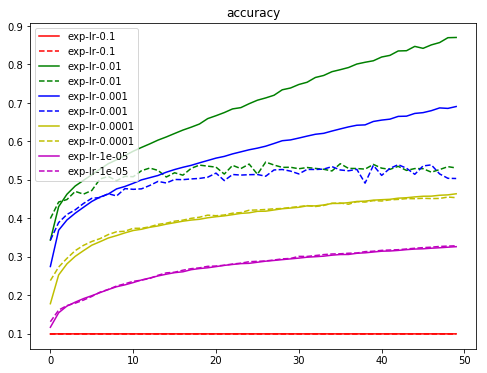

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

print('momentum: 0.95, nesterov=True')
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()
    
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()